In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [37]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [38]:
images = pd.read_csv("./train.csv")

In [39]:
labels = images.pop("label")

In [40]:
images = images.values.reshape(-1,784)

In [41]:
images = images/255

In [120]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

In [121]:
autoencoder.compile(optimizer='adam', loss='mae')

In [122]:
autoencoder.fit(images,images,batch_size=100,epochs=50)

Train on 42000 samples
Epoch 1/50
42000/42000 [==============================] - 2s 43us/sample - loss: 0.1347
Epoch 2/50
42000/42000 [==============================] - 1s 32us/sample - loss: 0.0965
Epoch 3/50
42000/42000 [==============================] - 1s 32us/sample - loss: 0.0769
Epoch 4/50
42000/42000 [==============================] - 1s 32us/sample - loss: 0.0686
Epoch 5/50
42000/42000 [==============================] - 1s 33us/sample - loss: 0.0650
Epoch 6/50
42000/42000 [==============================] - 1s 32us/sample - loss: 0.0622
Epoch 7/50
42000/42000 [==============================] - 1s 32us/sample - loss: 0.0597
Epoch 8/50
42000/42000 [==============================] - 1s 31us/sample - loss: 0.0577
Epoch 9/50
42000/42000 [==============================] - 1s 33us/sample - loss: 0.0562
Epoch 10/50
42000/42000 [==============================] - 1s 32us/sample - loss: 0.0546
Epoch 11/50
42000/42000 [==============================] - 1s 32us/sample - loss: 0.0535
Epoch 1

In [123]:
i = 10
img = images[i:i+1].copy()

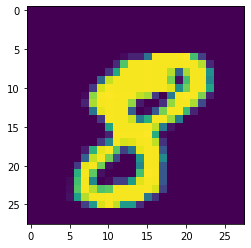

In [124]:
plt.imshow(img.reshape(28,28))

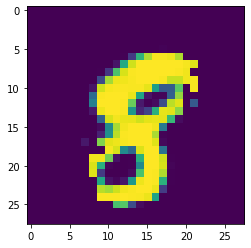

In [125]:
plt.imshow(autoencoder.predict(img).reshape(28,28))